<a href="https://colab.research.google.com/github/gabrielbaltazarmw2/Conceitos-TV-P2/blob/main/01_OFDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Questão 1

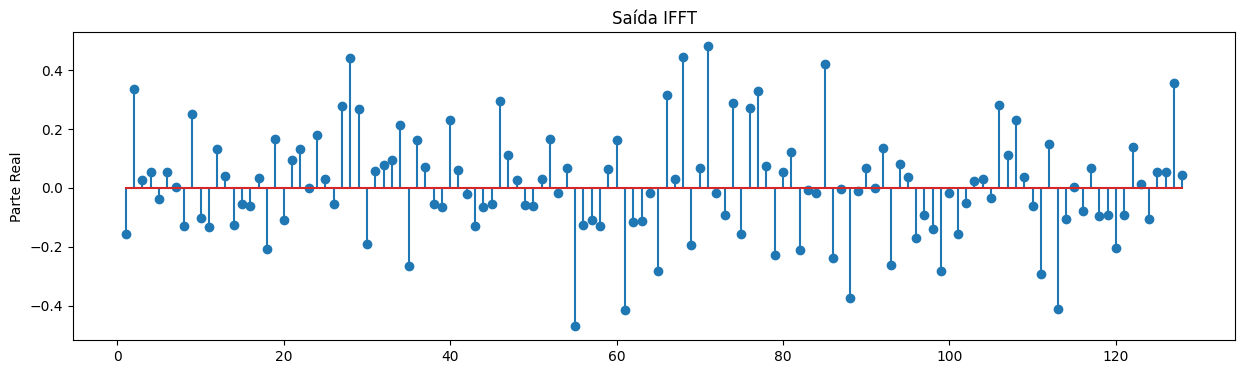

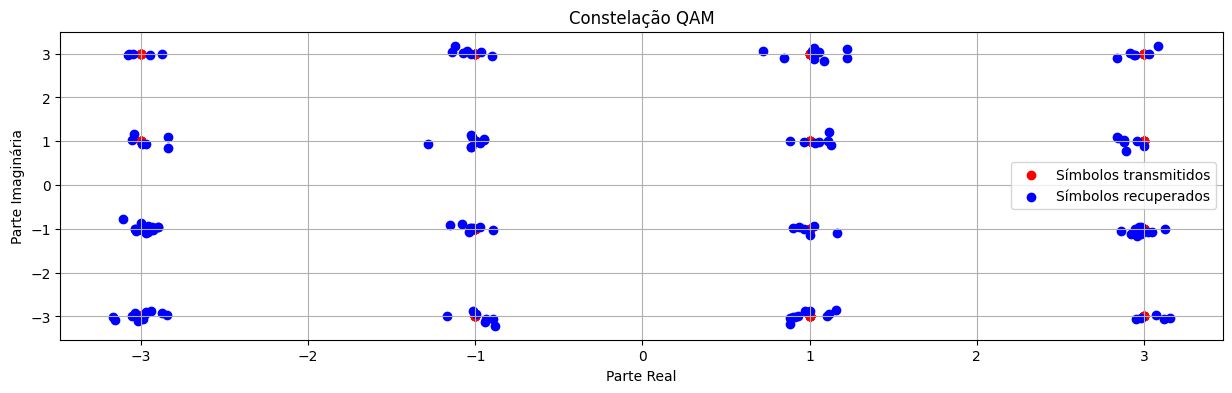

Símbolos recuperados correspondem aos símbolos transmitidos.


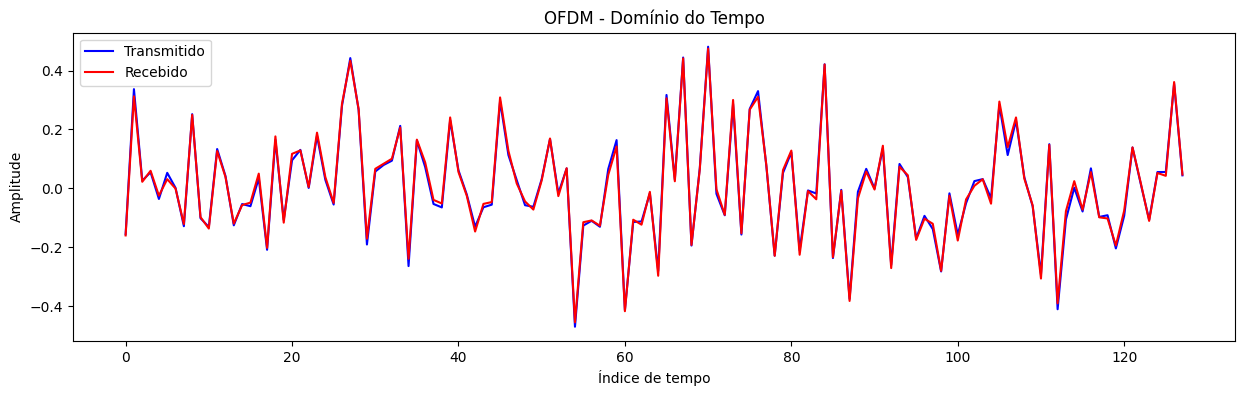

In [111]:
import numpy as np
import matplotlib.pyplot as plt

bps = 4  # Bits por símbolo
M = 2 ** bps  # 16QAM
nFFT = 128  # Número de pontos FFT

# geração da sequêcia de símbolos de 1-16 e tamanho 128
txsymbols = np.random.randint(0, M, size=(nFFT,))

# geração da constelação 16QAM
constellation = np.array([-3 - 3j, -3 - 1j, -3 + 3j, -3 + 1j,
                         -1 - 3j, -1 - 1j, -1 + 3j, -1 + 1j,
                          3 - 3j,  3 - 1j,  3 + 3j,  3 + 1j,
                          1 - 3j,  1 - 1j,  1 + 3j,  1 + 1j])

# Mapeamento dos símbolos para a constelação QAM
tx_symbols_ofdm = constellation[txsymbols]

# IFFT é aplicada para transformar o sinal em senoides sobrepostas ortogonais (subportadoras) no domínio do tempo
tx_time_signal = np.fft.ifft(tx_symbols_ofdm, nFFT)

plt.figure(figsize=(15, 4))
plt.stem(np.arange(1, nFFT + 1), np.real(tx_time_signal))
plt.ylabel('Parte Real')
plt.title('Saída IFFT')
plt.show()

# Simulação do canal (adição de ruído AWGN)
SNR_dB = 40
SNR_linear = 10 ** (SNR_dB / 10)
noise_std = np.sqrt(1 / SNR_linear)
rx_time_signal = tx_time_signal + noise_std * np.random.randn(nFFT,)  # Adicionando ruído AWGN

# FFT - Transformada de Fourier
rx_symbols_ofdm = np.fft.fft(rx_time_signal, nFFT)

# Demapeamento dos símbolos recebidos
rx_symbols_demapped = np.argmin(np.abs(rx_symbols_ofdm[:, None] - constellation), axis=1)

# Plotagem da constelação dos símbolos transmitidos
plt.figure(figsize=(15, 4))
plt.scatter(np.real(tx_symbols_ofdm), np.imag(tx_symbols_ofdm), color='red', label='Símbolos transmitidos')
plt.scatter(np.real(rx_symbols_ofdm), np.imag(rx_symbols_ofdm), color='blue', label='Símbolos recuperados')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginária')
plt.title('Constelação QAM')
plt.legend()
plt.grid(True)
plt.show()

# Plotagem no domínio do tempo
plt.figure(figsize=(15, 4))
plt.plot(np.real(tx_time_signal), 'b-', label='Transmitido')
plt.plot(np.real(rx_time_signal), 'r-', label='Recebido')
plt.xlabel('Índice de tempo')
plt.ylabel('Amplitude')
plt.title('OFDM - Domínio do Tempo')
plt.legend()

if np.array_equal(txsymbols, rx_symbols_demapped):
    print("Símbolos recuperados correspondem aos símbolos transmitidos.")
else:
    print("Símbolos recuperados não correspondem aos símbolos transmitidos.")

#Código somente com delay

In [216]:
import numpy as np
from scipy.signal import convolve

bps = 4  # Número de bits por símbolo
M = 2 ** bps  # Ordem de modulação
nFFT = 128  # Número de compartimentos FFT
nCP = 8  # Comprimento do prefixo cíclico

# Gerar símbolos aleatórios
txsymbols = np.random.randint(0, M, size=(nFFT,))

# Geração da constelação 16QAM
constellation = np.array([-3 - 3j, -3 - 1j, -3 + 3j, -3 + 1j,
                         -1 - 3j, -1 - 1j, -1 + 3j, -1 + 1j,
                          3 - 3j,  3 - 1j,  3 + 3j,  3 + 1j,
                          1 - 3j,  1 - 1j,  1 + 3j,  1 + 1j])

# Mapeamento dos símbolos para a constelação QAM
txgrid = constellation[txsymbols]

# Realizar a IFFT
txout = np.fft.ifft(txgrid, nFFT)

# Adicionar o prefixo cíclico
txcp = txout[-nCP:]
txout_ciclic = np.concatenate((txcp, txout))

# Simulação do canal (adição de ruído AWGN)
SNR_dB = 40
SNR_linear = 10 ** (SNR_dB / 10)
noise_std = np.sqrt(1 / SNR_linear)
rxin = txout_ciclic + noise_std * np.random.randn(len(txout_ciclic),)  # Adicionando ruído AWGN

# Adicionar atraso
delay = 5
rxin_delay = np.roll(rxin, delay)  # Aplicar o atraso

# Remover o prefixo cíclico e sincronizar o sinal recebido
rxin_no_delay = np.roll(rxin_delay, -delay)
rxsync = rxin_no_delay[nCP:]

# Realizar a FFT
rxgrid = np.fft.fft(rxsync, nFFT)

# Demapeamento dos símbolos recebidos
rxsymbols = np.argmin(np.abs(rxgrid[:, None] - constellation), axis=1)

if np.array_equal(txsymbols, rxsymbols):
    print("A saída do receptor corresponde à entrada do transmissor.")
else:
    print("Símbolos recebidos não correspondem aos símbolos transmitidos.")



A saída do receptor corresponde à entrada do transmissor.


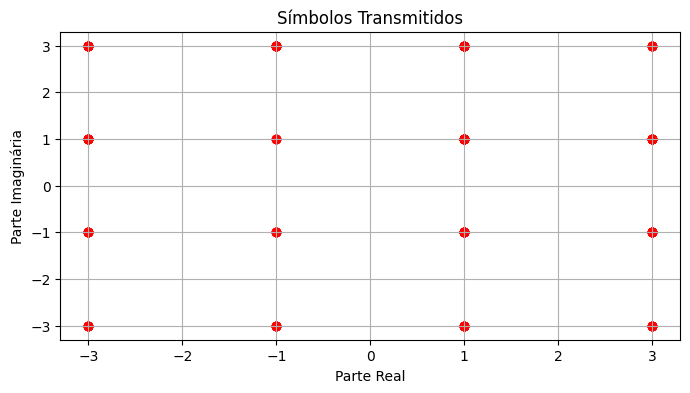

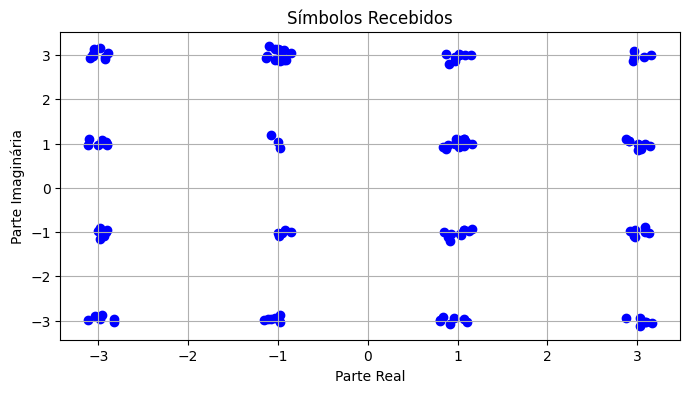

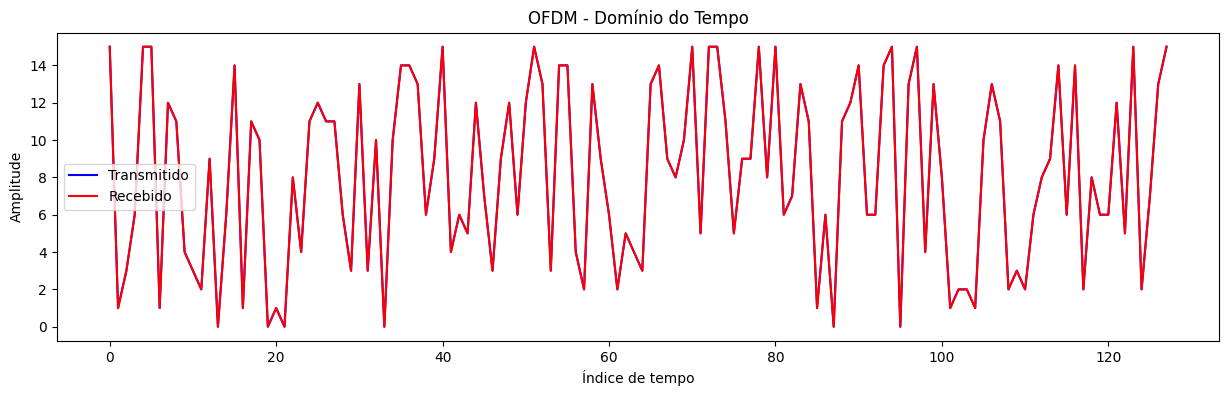

In [218]:
import matplotlib.pyplot as plt

# Plotagem dos símbolos transmitidos
plt.figure(figsize=(8, 4))
plt.scatter(np.real(txgrid), np.imag(txgrid), color='red')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginária')
plt.title('Símbolos Transmitidos')
plt.grid(True)
plt.show()

# Plotagem dos símbolos recebidos
plt.figure(figsize=(8, 4))
plt.scatter(np.real(rxgrid), np.imag(rxgrid), color='blue')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginária')
plt.title('Símbolos Recebidos')
plt.grid(True)
plt.show()

# Plotagem no domínio do tempo
plt.figure(figsize=(15, 4))
plt.plot(np.real(txsymbols), 'b-', label='Transmitido')
plt.plot(np.real(rxsymbols), 'r-', label='Recebido')
plt.xlabel('Índice de tempo')
plt.ylabel('Amplitude')
plt.title('OFDM - Domínio do Tempo')
plt.legend()

In [221]:
txsymbols, rxsymbols

(array([15,  1,  3,  6, 15, 15,  1, 12, 11,  4,  3,  2,  9,  0,  6, 14,  1,
        11, 10,  0,  1,  0,  8,  4, 11, 12, 11, 11,  6,  3, 13,  3, 10,  0,
        10, 14, 14, 13,  6,  9, 15,  4,  6,  5, 12,  7,  3,  9, 12,  6, 12,
        15, 13,  3, 14, 14,  4,  2, 13,  9,  6,  2,  5,  4,  3, 13, 14,  9,
         8, 10, 15,  5, 15, 15, 11,  5,  9,  9, 15,  8, 15,  6,  7, 13, 11,
         1,  6,  0, 11, 12, 14,  6,  6, 14, 15,  0, 13, 15,  4, 13,  8,  1,
         2,  2,  1, 10, 13, 11,  2,  3,  2,  6,  8,  9, 14,  6, 14,  2,  8,
         6,  6, 12,  5, 15,  2,  7, 13, 15]),
 array([15,  1,  3,  6, 15, 15,  1, 12, 11,  4,  3,  2,  9,  0,  6, 14,  1,
        11, 10,  0,  1,  0,  8,  4, 11, 12, 11, 11,  6,  3, 13,  3, 10,  0,
        10, 14, 14, 13,  6,  9, 15,  4,  6,  5, 12,  7,  3,  9, 12,  6, 12,
        15, 13,  3, 14, 14,  4,  2, 13,  9,  6,  2,  5,  4,  3, 13, 14,  9,
         8, 10, 15,  5, 15, 15, 11,  5,  9,  9, 15,  8, 15,  6,  7, 13, 11,
         1,  6,  0, 11, 12, 14,  6,  6, 14

# Efeito de canal aplicado sem multipercursos

In [229]:
import numpy as np
from scipy.signal import convolve

# Define as variáveis
bps = 4  # Número de bits por símbolo
M = 2 ** bps  # Ordem de modulação
nFFT = 128  # Número de compartimentos FFT
nCP = 8  # Comprimento do prefixo cíclico

# Gerar símbolos aleatórios
txsymbols = np.random.randint(0, M, size=(nFFT,))

# Geração da constelação 16QAM
constellation = np.array([-3 - 3j, -3 - 1j, -3 + 3j, -3 + 1j,
                         -1 - 3j, -1 - 1j, -1 + 3j, -1 + 1j,
                          3 - 3j,  3 - 1j,  3 + 3j,  3 + 1j,
                          1 - 3j,  1 - 1j,  1 + 3j,  1 + 1j])

# Mapeamento dos símbolos para a constelação QAM
txgrid = constellation[txsymbols]

# Realizar a IFFT
txout = np.fft.ifft(txgrid, nFFT)

# Adicionar o prefixo cíclico
txcp = txout[-nCP:]
txout_ciclic = np.concatenate((txcp, txout))

# Simulação do canal (adição de ruído AWGN)
SNR_dB = 40
SNR_linear = 10 ** (SNR_dB / 10)
noise_std = np.sqrt(1 / SNR_linear)
rxin = txout_ciclic + noise_std * np.random.randn(len(txout_ciclic),)  # Adicionando ruído AWGN

# Filtrar a transmissão através de um canal com dependência de frequência
hchan = np.array([0.4, 1, 0.4])
rxin_filtered = convolve(rxin, hchan, mode='full')[:len(rxin)]

# Adicionar atraso
delay = 5
rxin_delay = np.roll(rxin_filtered, delay)  # Aplicar o atraso

# Remover o prefixo cíclico e sincronizar o sinal recebido
rxin_no_delay = np.roll(rxin_delay, -delay)
rxsync = rxin_no_delay[nCP:]

# Equalização
hfchan = np.fft.fft(hchan, nFFT)
rxgrid_eq = np.fft.fft(rxsync, nFFT) / (hfchan)

# Demapeamento dos símbolos recebidos
rxsymbols = np.argmin(np.abs(rxgrid_eq[:, None] - constellation), axis=1)

# Verificar se os símbolos recebidos correspondem aos símbolos transmitidos
if np.allclose(txsymbols, rxsymbols):
    print("Os símbolos recebidos correspondem aos símbolos transmitidos.")
else:
    print("Os símbolos recebidos não correspondem aos símbolos transmitidos.")



Os símbolos recebidos correspondem aos símbolos transmitidos.


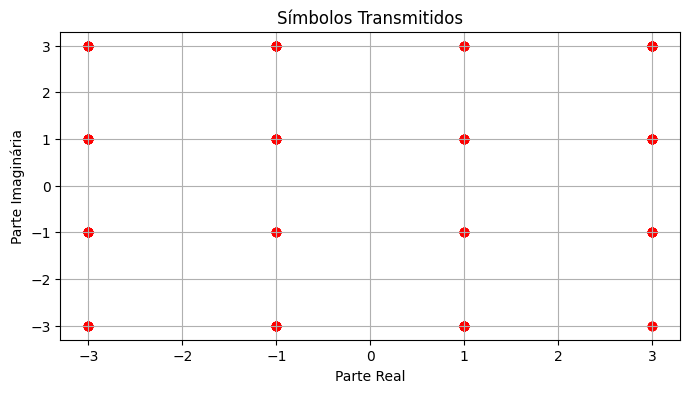

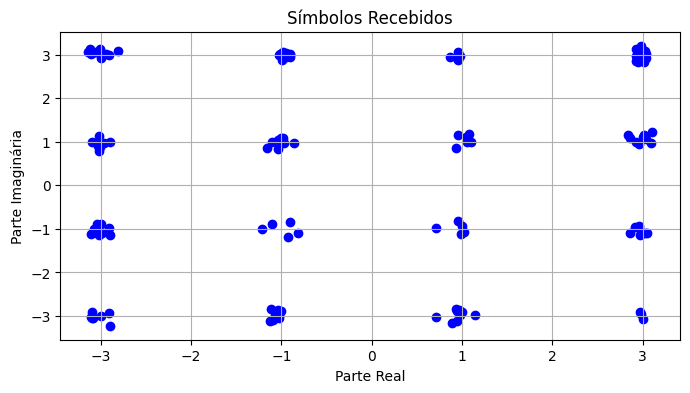

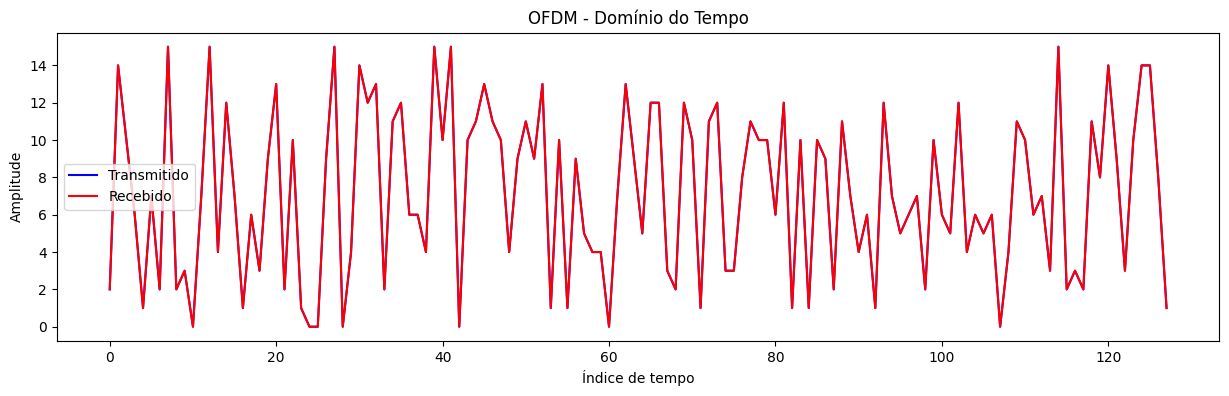

In [227]:
import matplotlib.pyplot as plt

# Plotagem dos símbolos transmitidos
plt.figure(figsize=(8, 4))
plt.scatter(np.real(txgrid), np.imag(txgrid), color='red')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginária')
plt.title('Símbolos Transmitidos')
plt.grid(True)
plt.show()

# Plotagem dos símbolos recebidos
plt.figure(figsize=(8, 4))
plt.scatter(np.real(rxgrid_eq), np.imag(rxgrid_eq), color='blue')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginária')
plt.title('Símbolos Recebidos')
plt.grid(True)
plt.show()

# Plotagem no domínio do tempo
plt.figure(figsize=(15, 4))
plt.plot(np.real(txsymbols), 'b-', label='Transmitido')
plt.plot(np.real(rxsymbols), 'r-', label='Recebido')
plt.xlabel('Índice de tempo')
plt.ylabel('Amplitude')
plt.title('OFDM - Domínio do Tempo')
plt.legend()

#Efeito do canal aplicado com multipercursos

In [234]:
import numpy as np
from scipy.signal import convolve

# Define as variáveis
bps = 4  # Número de bits por símbolo
M = 2 ** bps  # Ordem de modulação
nFFT = 128  # Número de compartimentos FFT
nCP = 8  # Comprimento do prefixo cíclico

# Gerar símbolos aleatórios
txsymbols = np.random.randint(0, M, size=(nFFT,))

# Geração da constelação 16QAM
constellation = np.array([-3 - 3j, -3 - 1j, -3 + 3j, -3 + 1j,
                         -1 - 3j, -1 - 1j, -1 + 3j, -1 + 1j,
                          3 - 3j,  3 - 1j,  3 + 3j,  3 + 1j,
                          1 - 3j,  1 - 1j,  1 + 3j,  1 + 1j])

# Mapeamento dos símbolos para a constelação QAM
txgrid = constellation[txsymbols]

# Realizar a IFFT
txout = np.fft.ifft(txgrid, nFFT)

# Adicionar o prefixo cíclico
txcp = txout[-nCP:]
txout_ciclic = np.concatenate((txcp, txout))

# Simulação do canal (adição de ruído AWGN)
SNR_dB = 40
SNR_linear = 10 ** (SNR_dB / 10)
noise_std = np.sqrt(1 / SNR_linear)
rxin = txout_ciclic + noise_std * np.random.randn(len(txout_ciclic),)  # Adicionando ruído AWGN

# Modelar múltiplos percursos no canal
hchan = np.array([0.4, 1, 0.4])  # Coeficientes do canal principal
hchan_multipath = np.array([0.3, 0.2, 0.1])  # Coeficientes dos caminhos de propagação adicionais
channel_response = np.convolve(hchan, hchan_multipath)  # Resposta impulsiva combinada do canal

# Filtrar a transmissão através do canal com múltiplos percursos
rxin_filtered = convolve(rxin, channel_response, mode='full')[:len(rxin)]

# Adicionar atraso
delay = 5
rxin_delay = np.roll(rxin_filtered, delay)  # Aplicar o atraso

# Remover o prefixo cíclico e sincronizar o sinal recebido
rxin_no_delay = np.roll(rxin_delay, -delay)
rxsync = rxin_no_delay[nCP:]

# Equalização
hfchan = np.fft.fft(channel_response, nFFT)
rxgrid_eq = np.fft.fft(rxsync, nFFT) / (hfchan)

rx_time = np.fft.ifft(rxgrid_eq, nFFT)

# Demodulação QAM
rxsymbols = np.argmin(np.abs(rxgrid_eq[:, np.newaxis] - constellation), axis=1)

# Verificar se os símbolos recebidos correspondem aos símbolos transmitidos
if np.array_equal(txsymbols, rxsymbols):
    print("Os símbolos recebidos correspondem aos símbolos transmitidos.")
else:
    print("Os símbolos recebidos não correspondem aos símbolos transmitidos.")


Os símbolos recebidos correspondem aos símbolos transmitidos.


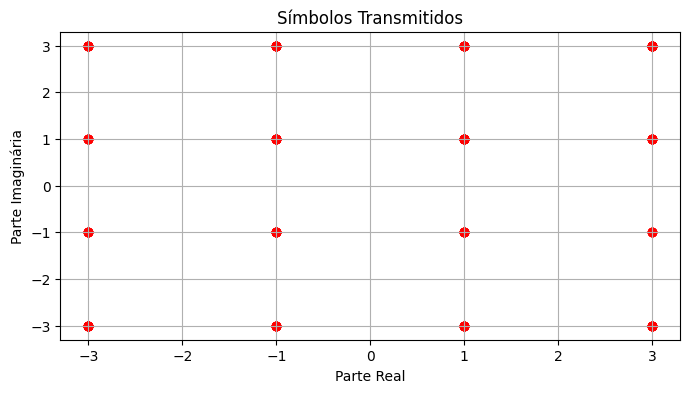

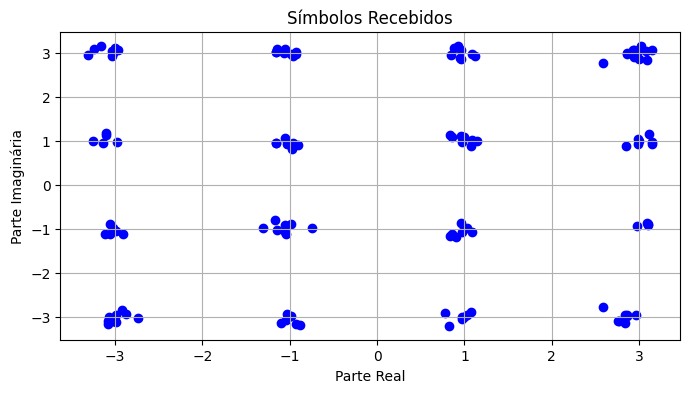

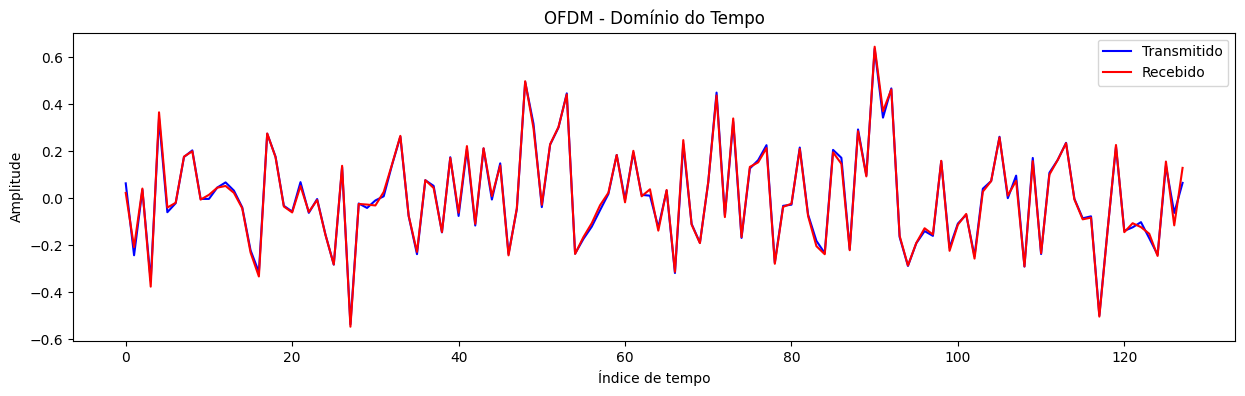

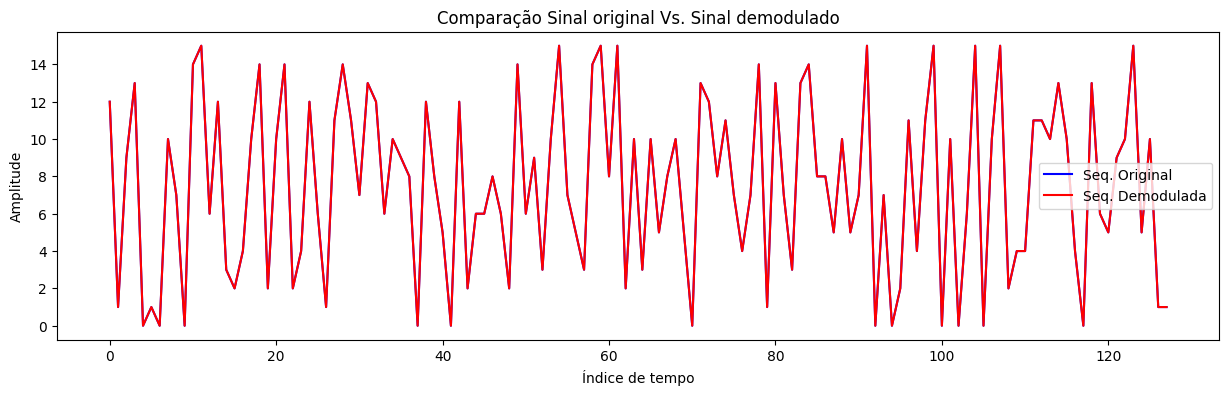

In [236]:
import matplotlib.pyplot as plt

# Plotagem dos símbolos transmitidos
plt.figure(figsize=(8, 4))
plt.scatter(np.real(txgrid), np.imag(txgrid), color='red')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginária')
plt.title('Símbolos Transmitidos')
plt.grid(True)
plt.show()

# Plotagem dos símbolos recebidos
plt.figure(figsize=(8, 4))
plt.scatter(np.real(rxgrid_eq), np.imag(rxgrid_eq), color='blue')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginária')
plt.title('Símbolos Recebidos')
plt.grid(True)
plt.show()

# Plotagem no domínio do tempo
plt.figure(figsize=(15, 4))
plt.plot(np.real(txout), 'b-', label='Transmitido')
plt.plot(np.real(rx_time), 'r-', label='Recebido')
plt.xlabel('Índice de tempo')
plt.ylabel('Amplitude')
plt.title('OFDM - Domínio do Tempo')
plt.legend()

# Plotagem das sequências
plt.figure(figsize=(15, 4))
plt.plot(np.real(txsymbols), 'b-', label='Seq. Original')
plt.plot(np.real(rxsymbols), 'r-', label='Seq. Demodulada')
plt.xlabel('Índice de tempo')
plt.ylabel('Amplitude')
plt.title('Comparação Sinal original Vs. Sinal demodulado')
plt.legend()

In [237]:
txsymbols, rxsymbols

(array([12,  1,  9, 13,  0,  1,  0, 10,  7,  0, 14, 15,  6, 12,  3,  2,  4,
        10, 14,  2, 10, 14,  2,  4, 12,  6,  1, 11, 14, 11,  7, 13, 12,  6,
        10,  9,  8,  0, 12,  8,  5,  0, 12,  2,  6,  6,  8,  6,  2, 14,  6,
         9,  3, 10, 15,  7,  5,  3, 14, 15,  8, 15,  2, 10,  3, 10,  5,  8,
        10,  5,  0, 13, 12,  8, 11,  7,  4,  7, 14,  1, 13,  7,  3, 13, 14,
         8,  8,  5, 10,  5,  7, 15,  0,  7,  0,  2, 11,  4, 11, 15,  0, 10,
         0,  6, 15,  0, 10, 15,  2,  4,  4, 11, 11, 10, 13, 10,  4,  0, 13,
         6,  5,  9, 10, 15,  5, 10,  1,  1]),
 array([12,  1,  9, 13,  0,  1,  0, 10,  7,  0, 14, 15,  6, 12,  3,  2,  4,
        10, 14,  2, 10, 14,  2,  4, 12,  6,  1, 11, 14, 11,  7, 13, 12,  6,
        10,  9,  8,  0, 12,  8,  5,  0, 12,  2,  6,  6,  8,  6,  2, 14,  6,
         9,  3, 10, 15,  7,  5,  3, 14, 15,  8, 15,  2, 10,  3, 10,  5,  8,
        10,  5,  0, 13, 12,  8, 11,  7,  4,  7, 14,  1, 13,  7,  3, 13, 14,
         8,  8,  5, 10,  5,  7, 15,  0,  7

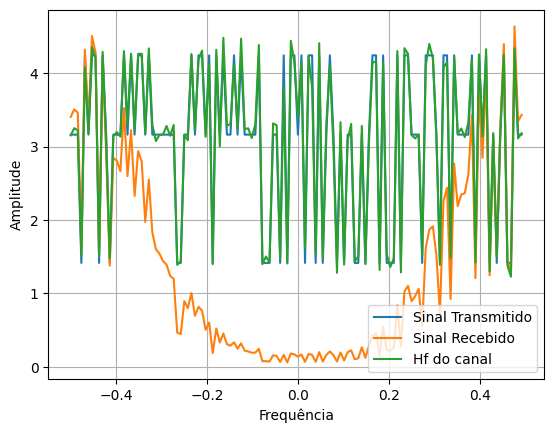

In [250]:
import matplotlib.pyplot as plt

# Calcular as amplitudes no domínio da frequência
# tx_freq = np.fft.fftshift(np.fft.fft(txout, nFFT))
# rx_freq = np.fft.fftshift(np.fft.fft(rxsync, nFFT))
tx_freq = np.abs(np.fft.fft(txout, nFFT))
rx_freq = np.fft.fft(rxsync, nFFT)

# Calcular as frequências correspondentes
freq = np.fft.fftshift(np.fft.fftfreq(nFFT))

# Plotar o sinal transmitido e recebido no domínio da frequência
plt.figure()
plt.plot(freq, np.abs(tx_freq), label='Sinal Transmitido')
plt.plot(freq, np.abs(rx_freq), label='Sinal Recebido')
plt.plot(freq, np.abs(rxgrid_eq), label='Hf do canal')
plt.xlabel('Frequência')
plt.ylabel('Amplitude')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# superamostragem

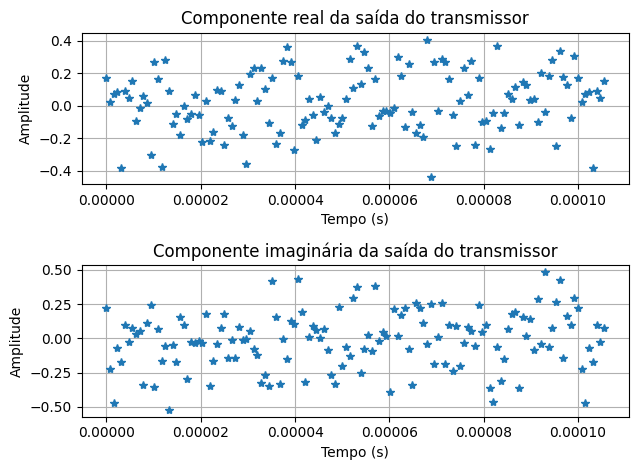

In [253]:
import numpy as np
import matplotlib.pyplot as plt

k = 4           # Número de bits por símbolo
M = 2 ** k      # Ordem de modulação
nFFT = 128      # Número de compartimentos FFT
cplen = 8       # Comprimento do CP

txsymbols = np.random.randint(0, M, size=(nFFT,))
constellation = np.array([-3 - 3j, -3 - 1j, -3 + 3j, -3 + 1j,
                          -1 - 3j, -1 - 1j, -1 + 3j, -1 + 1j,
                           3 - 3j,  3 - 1j,  3 + 3j,  3 + 1j,
                           1 - 3j,  1 - 1j,  1 + 3j,  1 + 1j])
txgrid = constellation[txsymbols]

txout = np.fft.ifft(txgrid, nFFT)
txcp = txout[-cplen:]
txout_cyclic = np.concatenate((txcp, txout))

scs = 20e3                  # Espaçamento da subportadora em Hz
Fs = scs * nFFT / 2         # Taxa de amostragem (1,28e6 Hz)
Ts = 1 / Fs                 # Duração da amostra em segundos
t = np.arange(0, len(txout_cyclic) * Ts, Ts)

plt.subplot(2, 1, 1)
plt.plot(t, np.real(txout_cyclic), '*')
plt.title('Componente real da saída do transmissor')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, np.imag(txout_cyclic), '*')
plt.title('Componente imaginária da saída do transmissor')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()


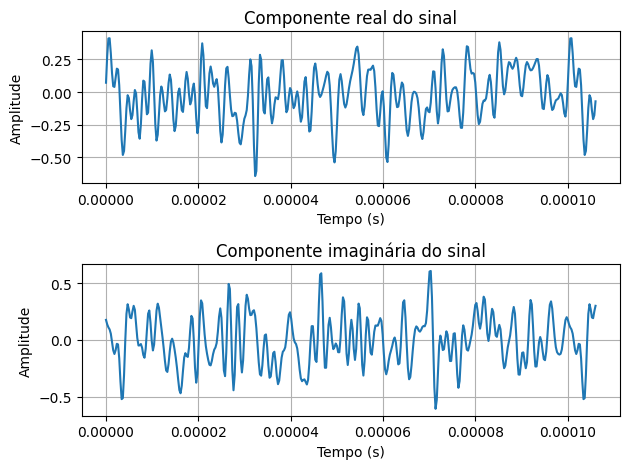

In [254]:
import numpy as np
import matplotlib.pyplot as plt

k = 4           # Número de bits por símbolo
M = 2 ** k      # Ordem de modulação
nFFT = 128      # Número de compartimentos FFT
cplen = 8       # Comprimento do CP
upFactor = 3    # Fator de oversampling

txsymbols = np.random.randint(0, M, size=(nFFT,))
constellation = np.array([-3 - 3j, -3 - 1j, -3 + 3j, -3 + 1j,
                          -1 - 3j, -1 - 1j, -1 + 3j, -1 + 1j,
                           3 - 3j,  3 - 1j,  3 + 3j,  3 + 1j,
                           1 - 3j,  1 - 1j,  1 + 3j,  1 + 1j])
txgrid = constellation[txsymbols]

nFFTUp = upFactor * nFFT
fftgrid = np.concatenate((txgrid[:nFFT//2],
                          np.zeros((upFactor - 1) * nFFT),
                          txgrid[nFFT//2:]))
txout = upFactor * np.fft.ifft(fftgrid, nFFTUp)
txout = txout.ravel()
cplenUp = cplen * upFactor
txcp = txout[nFFTUp - cplenUp:nFFTUp]
txout = np.concatenate((txcp, txout))

scs = 20e3                  # Espaçamento da subportadora em Hz
Fs = scs * nFFT / 2         # Taxa de amostragem (1,28e6 Hz)
Ts = 1 / (upFactor * Fs)    # Duração da amostra em segundos
t = np.arange(0, len(txout) * Ts, Ts)

plt.subplot(2, 1, 1)
plt.plot(t, np.real(txout))
plt.title('Componente real do sinal')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, np.imag(txout))
plt.title('Componente imaginária do sinal')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()


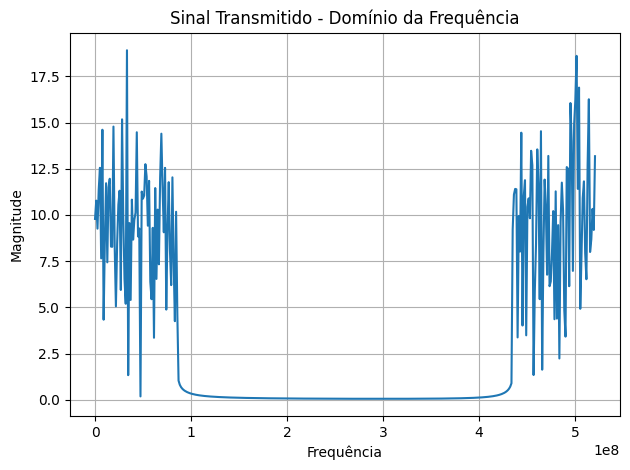

In [258]:
# Calcular a transformada de Fourier dos sinais
tx_freq = np.fft.fft(txout)

# Configurar o eixo de frequência
f = np.arange(0, len(txout) * Fs, Fs)

# Plotar o sinal transmitido no domínio da frequência
plt.plot(f, np.abs(tx_freq))
plt.title('Sinal Transmitido - Domínio da Frequência')
plt.xlabel('Frequência')
plt.ylabel('Magnitude')
plt.grid(True)

plt.tight_layout()
plt.show()

#Livro

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz

L = 1600000
Lfr = L // 32

s_data = 4 * np.round(np.random.rand(L, 1)) + 2 * np.round(np.random.rand(L, 1)) - 3 + 1j * (
        4 * np.round(np.random.rand(L, 1)) + 2 * np.round(np.random.rand(L, 1)) - 3)

channel = np.array([0.3, -0.5, 0, 1.2, -0.3])
hf = np.fft.fft(channel, 32)

p_data = s_data.reshape(32, Lfr)
p_td = np.fft.ifft(p_data, axis=0)
p_cyc = np.concatenate((p_td[-5:, :], p_td), axis=0)

s_cyc = p_cyc.reshape(37 * Lfr, 1)
Psig = 10 / 32
chsout = np.convolve(s_cyc.flatten(), channel)

noiseq = np.random.randn(37 * Lfr, 1) + 1j * np.random.randn(37 * Lfr, 1)
SEReq = []
for ii in range(31):
    SNR = ii
    Asig = np.sqrt(Psig * 10 ** (-SNR / 10)) * np.linalg.norm(channel)
    x_out = chsout + Asig * noiseq
    x_para = x_out.reshape(37, Lfr)
    x_disc = x_para[5:37, :]
    xhat_para = np.fft.fft(x_disc, axis=0)
    z_data = np.linalg.inv(np.diag(hf)) @ xhat_para
    deq = np.sign(np.real(z_data)) + np.sign(np.real(z_data) - 2) + np.sign(np.real(z_data) + 2) + \
          1j * (np.sign(np.imag(z_data)) + np.sign(np.imag(z_data) - 2) + np.sign(np.imag(z_data) + 2))
    SEReq.append(np.sum(p_data != deq, axis=1) / Lfr)

SNRa = np.arange(1, 10) * 2
Q = 3 * 0.5 * np.erfc(np.sqrt((2 * 10 ** (SNRa * 0.1 / 5)) / 2))

plt.figure(2)
plt.stem(np.abs(hf))
plt.xlabel('Subcarrier label')
plt.title('Subchannel gain')

plt.figure(3)
plt.subplot(221)
plt.plot(np.real(z_data[0, :800]), '.')
plt.ylabel('Imaginary')
plt.title('(a) Subchannel 1 output')
plt.axis('square')
plt.subplot(222)
plt.plot(np.real(z_data[9, :800]), '.')
plt.ylabel('Imaginary')
plt.title('(b) Subchannel 10 output')
plt.axis('square')
plt.subplot(223)
plt.plot(np.real(z_data[14, :800]), '.')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('(c) Subchannel 15 output')
plt.axis('square')
plt.subplot(224)
plt.plot(np.real(z_data[:, :800]), 'b.')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('(d) Mixed OFDM output')
plt.axis('square')

plt.figure(4)
figc = plt.semilogy(SNRa, Q, 'k-', SNR, np.mean(SEReq, axis=0), 'b-o',
                    SNR, np.mean(np.concatenate((SEReq[:14], SEReq[19:]), axis=0), axis=0), 'b-s')
plt.setp(figc, linewidth=2)
plt.legend(['Ideal channel', 'Using all subcarriers', 'Disabling 5 poor subcarriers'])
plt.title('Average OFDM SER')
plt.axis([1, 30, 1e-4, 1])
plt.xlabel('SNR (dB)')
plt.ylabel('Symbol Error Rate (SER)')

plt.show()


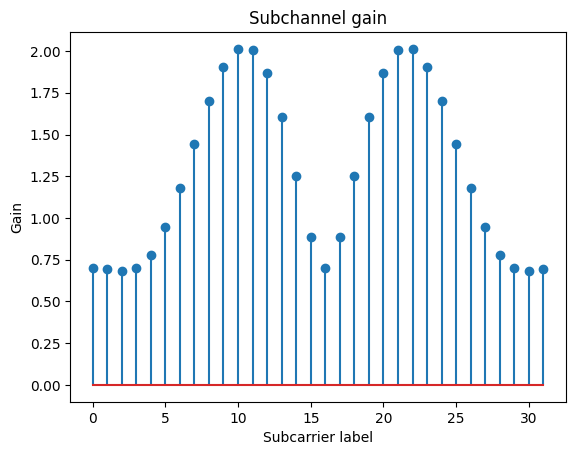

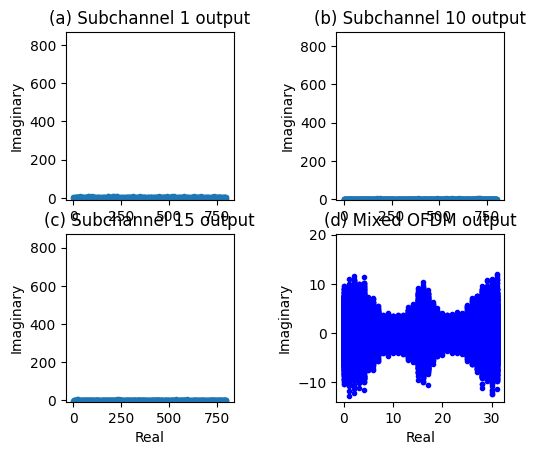

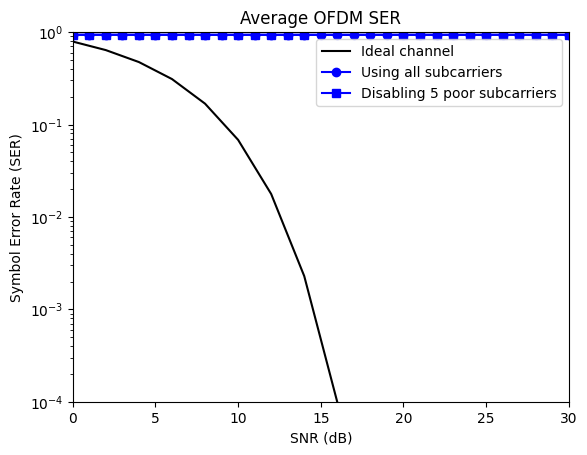

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import dft

# Parâmetros
L = 160000  # Total de símbolos de dados
N = 32  # Número de subportadoras
Lfr = L // N  # Número de quadros de dados
Psig = 10 / 32  # Potência do sinal
channel = np.array([0.3, -0.5, 0, 1.2, -0.3])  # Canal

# Gerando dados de sinal polar aleatórios
s_data = 4 * np.round(np.random.rand(L, 1)) + 2 * np.round(np.random.rand(L, 1)) - 3 + \
         1j * (4 * np.round(np.random.rand(L, 1)) + 2 * np.round(np.random.rand(L, 1)) - 3)

hf = np.fft.fft(channel, N)  # Canal na frequência

p_data = np.reshape(s_data, (N, Lfr))
p_td = np.fft.ifft(p_data, axis=0)
p_cyc = np.concatenate((p_td[-5:], p_td), axis=0)

s_cyc = np.reshape(p_cyc, (37 * Lfr, 1))
chsout = np.convolve(channel, s_cyc.flatten())[:37 * Lfr]

noiseq = np.random.randn(37 * Lfr) + 1j * np.random.randn(37 * Lfr)
SEReq = []
for ii in range(31):
    SNR = ii
    Asig = np.sqrt(Psig * 10 ** (-SNR / 10)) * np.linalg.norm(channel)
    x_out = chsout + Asig * noiseq
    x_para = np.reshape(x_out, (37, Lfr))
    x_disc = x_para[5:37, :]
    xhat_para = np.fft.fft(x_disc, axis=0)
    z_data = np.linalg.inv(np.diag(hf)) @ xhat_para
    deq = np.sign(np.real(z_data)) + np.sign(np.real(z_data) - 2) + np.sign(np.real(z_data) + 2) + \
          1j * (np.sign(np.imag(z_data)) + np.sign(np.imag(z_data) - 2) + np.sign(np.imag(z_data) + 2))
    SEReq.append(np.sum(p_data != deq, axis=1) / Lfr)

SNRa = np.arange(0, 19, 2)
from scipy.special import erfc
Q = 3 * 0.5 * erfc(np.sqrt((2 * 10 ** (SNRa * 0.1) / 5) / 2))

# Plotando os resultados
# Gráfico dos ganhos das subportadoras
plt.figure(1)
plt.stem(np.abs(hf))
plt.xlabel('Subcarrier label')
plt.ylabel('Gain')
plt.title('Subchannel gain')

# Gráfico da dispersão das constelações das subportadoras após OFDM
plt.figure(2)
plt.subplot(221)
plt.plot(np.real(z_data[0, :800]), '.')
plt.ylabel('Imaginary')
plt.title('(a) Subchannel 1 output')
plt.axis('square')
plt.subplot(222)
plt.plot(np.real(z_data[9, :800]), '.')
plt.ylabel('Imaginary')
plt.title('(b) Subchannel 10 output')
plt.axis('square')
plt.subplot(223)
plt.plot(np.real(z_data[14, :800]), '.')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('(c) Subchannel 15 output')
plt.axis('square')
plt.subplot(224)
plt.plot(np.real(z_data[:, :800]), 'b.')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('(d) Mixed OFDM output')
plt.axis('square')

# Gráfico da SER média do OFDM versus SER sob "canal ideal"
plt.figure(3)
plt.semilogy(SNRa, Q, 'k-', label='Ideal channel')
plt.semilogy(range(31), np.mean(SEReq, axis=1), 'b-o', label='Using all subcarriers')
plt.semilogy(list(range(15)) + list(range(20, 31)), np.mean(np.concatenate((SEReq[:15], SEReq[20:]), axis=0), axis=1),
             'b-s', label='Disabling 5 poor subcarriers')
plt.legend()
plt.title('Average OFDM SER')
plt.xlabel('SNR (dB)')
plt.ylabel('Symbol Error Rate (SER)')
plt.axis([0, 30, 1e-4, 1])
plt.show()

